TP 1 Régression
=======

Dans ce TP nous allons explorer la régression linéaire et polynomiale. 
Nous utiliserons les différentes méthodes de résolutions vues en cours: 
* Équation normale
* Descente de gradient
* Descente de gradient stochastique
Nous montrerons les différentes courbes d'apprentissage et testerons les modèles appris.
Tout d'abord importons les librairies dont nous aurons besoin:

In [1]:
# import des outils mathématiques
import numpy as np
from numpy.linalg import inv #pour l'inversion de matrice

# import des outils d'affichage
import matplotlib.pyplot as plt

# import des outils de machine learning
import sklearn as skl
import sklearn.datasets as data

Génération d'un dataset pour un problème de régression
-----------

Nous allons commencer par générer un dataset synthétique qui va nous servir pour expérimenter les algorithmes de régression. Rappel du problème de régression à une dimension : on dispose de données $(x,y)$ et l'on veut apprendre à prédire la valeur de $y$ à partir de $x$.

La bibliothèque `scikit-learn` permet de générer un problème de régression synthétique. Ceci peut se faire à l'aide de la fonction `make_regression` de la classe datasets importée ci-dessus sous le nom *data* (voir la documentation à
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html ).

En vous aidant de la documentation, générez un problème de régression linéaire composé de 50 points avec:
- une dimension de descripteur ($x$),
- une dimension informative ($y$),
- une dimension cible,
- un bruit d'écart type 5,
- un biais de 50.

Les données générées (abscisses et ordonnées) seront stockées dans deux tableaux nommés x et y. Affichez les dimensions de x et y (`ndim` doit être égal à 2 pour x et 1 pour y). Générez une figure avec les points obtenus. Vous mettrez dans une fonction nommée `plot_points(x,y)` la partie de génération du plot (sans les fonctions `plt.figure()` et `plt.show()`. 

Dimensions de x: 2 (50, 1)
Dimensions de y: 1 (50,)


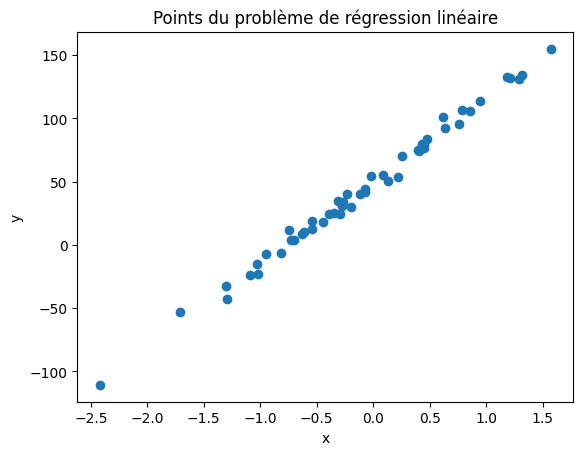

In [2]:
# Génération du dataset de régression linéaire
x, y = data.make_regression(n_samples=50, n_features=1, noise=5, bias=50)

print("Dimensions de x:", x.ndim, x.shape)
print("Dimensions de y:", y.ndim, y.shape)

def plot_points(x, y):
    plt.scatter(x[:, 0], y, marker='o')
    plt.title('Points du problème de régression linéaire')
    plt.xlabel('x')
    plt.ylabel('y')

plt.figure()
plot_points(x, y)
plt.show()

Résolution par l'équation normale
-----------

On peut résoudre le problème de regression à l'aide de l'équation normale qui fournit une résolution analytique matricielle à la régression. L'objectif est de prédire $y=w_0+w_1x$. On commence par ajouter une dimension au vecteur x et dont les valeurs sont toutes à 1. Cela peut se faire avec la fonction `add_dummy_features` de la classe `preprocessing` de sckikitlearn (voir la documentation à https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.add_dummy_feature.html). 
Stockez ceci dans un nouveau vecteur nommé `X` et affichez ses dimensions.

In [3]:
from sklearn.preprocessing import add_dummy_feature

X = add_dummy_feature(x)
print(X.ndim, "", X.shape)

2  (50, 2)


Appliquez l'équation normale pour calculez les poids w optimaux et stockez les dans un vecteur nommé `w`. La fonction `np.linalg.inv()` permet de calculer l'inverse d'une matrice. Affichez `w` puis refaites un plot des points générés avec la droite obtenue par l'équation normale (les coefficients sont dans w). 
Pour afficher la droite correspondant à la régression linéaire estimée, vous devrez générer (avec `np.linspace`) deux valeurs sur l'axe des abscisses (entre les valeurs min et max de `x`) et les stocker dans `x_line`. Ensuite il faut calculer le produit `w[0]*1 + w[1]*x_line`, et le stocker dans `y_line`. Enfin vous pouvez faire le plot de (`x_line`, `yline`). Une alternative est de faire les calculs en matriciel. Cela demande transformer `x_line` en matrice avec `X_line=np.array([x_line]).T` et de lui ajouter un dummy_feature. Vérifiez que la droite estimée passe bien par les points du dataset.

Poids optimaux (w): [50.03328286 65.60116133]


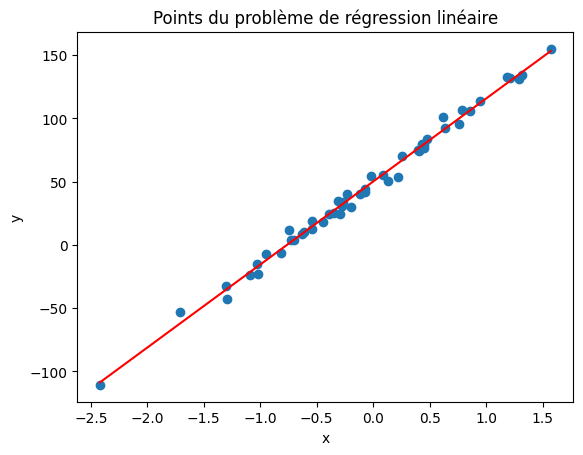

In [4]:
# Calcul des poids optimaux avec l'équation normale
w = np.linalg.inv(X.T @ X) @ X.T @ y
print("Poids optimaux (w):", w)

# Génération des points pour la droite de régression
x_line = np.linspace(np.min(x), np.max(x), 2)
y_line = w[0] * 1 + w[1] * x_line

plt.figure()
plot_points(x, y)
plt.plot(x_line, y_line, color='r', label='Régression normale')
plt.show()

Résolution par scikit-learn
-----------

La bibliothèque `scikit-learn` permet de résoudre directement un problème de régression linéaire en utilisant la classe `LinearRegression` ( https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html ). À l'aide de la documentation, résolvez le problème de régression précédent. Attention aux dimensions des entrées de la fonction `fit`: passez lui `X` et `y`. Affichez les coefficients trouvés par scikit-learn et vérifiez que ce sont bien les mêmes que ceux que vous aviez trouvés avec l'équation normale. 
Il est possible de prédire de nouvelles valeurs avec la fonction predict de la classe LinearRegression. Les données doivent être sous forme de matrice (utilisez le `X_line` de la cellule précédente).

Sur le même plot, Générez 30 points, faites la prédiction et affichez les prédictions.

w_skl: [50.03328286 65.60116133]


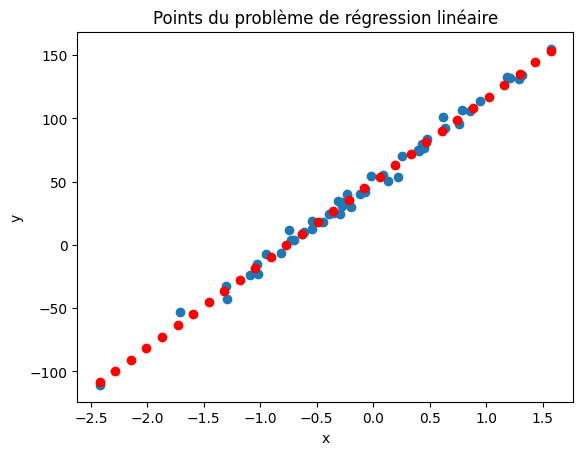

In [5]:
from sklearn.linear_model import LinearRegression

# Apprentissage du modèle de régression linéaire
lin_reg = LinearRegression()
lin_reg.fit(X, y)

w_skl= np.array([lin_reg.intercept_, lin_reg.coef_[1]])
print("w_skl:", w)
X_line = np.array([x_line]).T
X_line = add_dummy_feature(X_line)
y_line = lin_reg.predict(X_line)

# Sur le plot, générer 30 points, faites la prédiction et afficher les prédictions
x_plt = np.linspace(np.min(x), np.max(x), 30)
x_plt = np.array([x_plt]).T
x_plt = add_dummy_feature(x_plt)
y_plt = lin_reg.predict(x_plt)

plt.figure()
plot_points(x, y)
plt.scatter(x_plt[:, 1], y_plt, color='r', label='Prédictions')
plt.show()

Descente de gradient
-----

La résolution par l'équation normale peut poser différents problèmes. La matrice $X^T X$ peut ne pas être inversible (scikit-learn utilise la pseudo-inverse pour y pallier (`np.linalg.pinv()`). Cependant dès lors que l'on a beaucoup de données l'inversion de matrice est très couteuse à calculer et il vaut mieux procéder avec la descente de gradient que nous avons vue en cours. Nous allons commencer par coder celle-ci. Complétez le code ci-dessous afin de faire une boucle de `n_epochs` qui applique la descente de gradient (cf cours). Affichez la droite prédite et les points comme précédemment avec un learning rate de 0.0001 pour 100 époques. Vous allez constater que le résultat prédit est particulièrement mauvais : le nombre d'époques et le learning rate sont trop faibles. Essayez avec 1000 époques et un learning rate de 0.001. Comparez le vecteur `w` avec celui obtenu avec l'équation normale.


In [6]:
alpha = 0.001  # learning rate
n_epochs = 100
m = len(X)  # nombre d'instances

np.random.seed(42)
w = np.random.randn(2, )  # paramètres initialisés aléatoirement
#complétez la suite
for epoch in range(n_epochs):
    w = w - 2 * alpha / m * X.T @ (X @ w - y)
print("Poids optimaux (w) après descente de gradient:", w)

Poids optimaux (w) après descente de gradient: [8.43603642 7.54988806]


Descente de gradient par scikit-learn
-----------

scikit-learn fournit aussi un géresseur linaire qui fonctionne avec la descente de gradient. Il s'agit de la classe `SGDRegressor` (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html). Effectuez l'apprentissage de ce modèle (fixez uniquement les paramètres `max_iter` et `eta0` qui sont le nombre d'époques et le learning rate) et vérifiez que vous avez bien bien un résultat similaire à la cellule précédente pour le vecteur `w`. Vous pouvez afficher le coefficient de correlation entre les prédictions et les valeurs à apprendre avec `print('Correlation =', sgd_reg.score(X, y))` où `sgd_reg` est le modèle de regression par SGD. Variez les paramètres `max_iter` et `eta0` afin d'avoir environ 99% de correlation.

In [7]:
from sklearn.linear_model import SGDRegressor

# Apprentissage du modèle de régression linéaire par descente de gradient stochastique
sgd_reg = SGDRegressor(max_iter=10000000, eta0=0.001, penalty=None, fit_intercept=False)
sgd_reg.fit(X, y)

w_sgd = sgd_reg.coef_
print("w_sgd:", w_sgd)
print('Correlation =', sgd_reg.score(X, y))

w_sgd: [49.77000743 64.77026164]
Correlation = 0.9926985459652385


## Régression Polynomiale

Nous allons maintenant effectuer une regression polynomiale. Ceci est necéssaire lorsque les données à prédire ne dépendent pas linéairement des données d'entrée. Commençons par générer des données. Exécutez la cellule suivante.

Dimensions de x: 2 (100, 1)
Dimensions de y: 1 (100,)


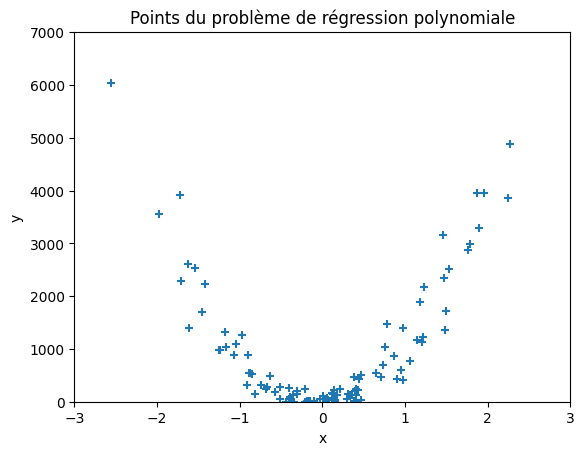

In [8]:
np.random.seed(0)
x,y = data.make_regression(n_samples=100, n_features=1, noise=8, bias=2)
y=0.5*y**2+y+2
print("Dimensions de x:", x.ndim, x.shape)
print("Dimensions de y:", y.ndim, y.shape)

def plot_points_poly(x,y):
    plt.scatter(x[:,0],y,marker='+')
    plt.title('Points du problème de régression polynomiale')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis([-3, 3, 0, 7000])

plt.figure()
plot_points_poly(x,y)
plt.show()


Pour faire de la regression polynomiale, il faut générer des attributs polynomiaux à ajouter à x. Pour cela nous pouvons utiliser ce qui vient de la classe scikit-learn `sklearn.preprocessing` et en particulier `PolynomialFeatures`. La documentation est disponible ici: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html. Ceci est fait dans la cellule suivante pour ajouter des variables polynomiales à notre dataset (le paramètre degree fixe le niveau du polynome, à vous de le fixer au mieux). Pour cela, faites une régression avec un `LinearRegression` et testez le résultat afin d'avoir la meilleure correlation. Comme précédemment afichez les points et une courbe de la prédiction. Essayez avec un polynome de degré entre 1 et 25 et comparez visuellement les résultats.

(100, 1) (100, 2)
Correlation = 0.9297195717859967


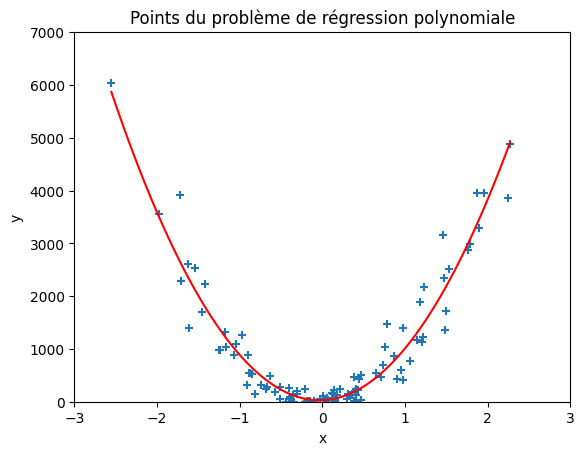

In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
print(x.shape, x_poly.shape)
#effectuez la Regression ensuite
sgd_reg=LinearRegression()
sgd_reg.fit(x_poly, y)

print('Correlation =', sgd_reg.score(x_poly, y))

x_line = np.linspace(np.min(x),np.max(x),100).reshape(100, 1)
x_line_poly=poly_features.fit_transform(x_line)
y_line=sgd_reg.predict(x_line_poly)

plt.figure()
plot_points_poly(x,y)
plt.plot(x_line, y_line,color='r', linestyle='-')
plt.show()

Vous avez du remarquer que lorsque le degré du polynome devient élevé, la courbe prédite a tendance à passer par les points de l'ensemble d'apprentissage. C'est un signe de sur-apprentissage. Pour mieux le comprendre, exécutez la cellule suivante. Elle présente trois régressions avec des polynomes de degrés croissants. Quelles sont vos conclusions ? Quel modèle de régression vaut-il mieux préférer ?

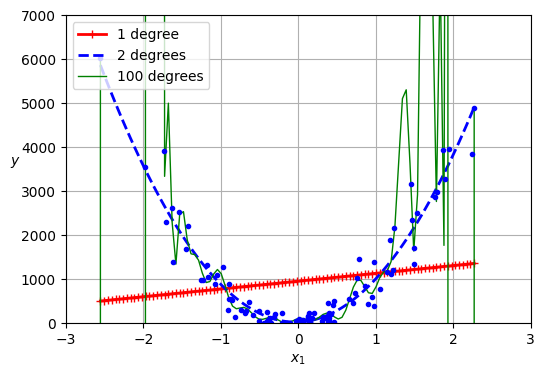

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 100)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(x, y)
    y_newbig = polynomial_regression.predict(x_line)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(x_line, y_newbig, style, label=label, linewidth=width)

plt.plot(x, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 7000])
plt.grid()
plt.show()

## Régression régularisée

Pour contrer le sur-apprentissage, il est possible d'utiliser la régularisation afin de pénaliser les coefficients associés à chaque niveau du polynome. C'est le cas de la régression Ridge vue en cours et disponible dans `sklearn.linear_model` sous le nom de `Ridge` (voir https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html). Nous utiliserons (après avoir importé la fonction) cette déclaration : `ridge_reg=Ridge(alpha=val, solver="cholesky")` où *val* est la valeur de la pénalisation. 

Inspirez-vous de la cellule précédente pour mettre sur un même graphique les prédictions effectuées avec une ridge regression polynomiale pour alpha prenant les valeurs données dans la cellule. Attention, un polynome de niveau 10 est choisi et il est necéssaire de normaliser les attributs sinon les niveaux élevés du polynome prennent le dessus sur les autres (cf cellule ci-dessus qui le fait avec `StandardScaler()`, faites de même).

Vous devez obtenir quelque chose comme suit : ![](./image1_TP1.png "Regression Ridge").

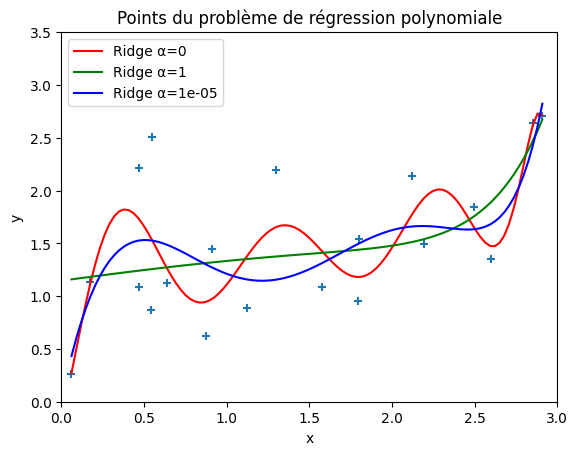

In [11]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
x = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * x + np.random.randn(m, 1) / 1.5
x_line = np.linspace(np.min(x),np.max(x),100).reshape(100, 1)

plt.figure()
plot_points_poly(x,y)

alphas=[0, 1, 1e-5]
colors=['r','g','b']

poly_features = PolynomialFeatures(degree=10, include_bias=False)
std_scaler = StandardScaler()


#à vous de compléter
for alpha, color in zip(alphas, colors):
    ridge_reg = make_pipeline(
        poly_features,
        std_scaler,
        Ridge(alpha=alpha)
    )
    ridge_reg.fit(x, y)
    y_newbig = ridge_reg.predict(x_line)
    label = f"Ridge α={alpha}"
    plt.plot(x_line, y_newbig, color=color, linestyle='-', label=label)

#fin de l'affichage
plt.axis([0, 3, 0, 3.5])
plt.legend(loc="upper left")
plt.show()
